In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/dataset/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
train_dir = "./train" #passing the path with training images
test_dir = "./test"   #passing the path with testing images

In [ ]:
row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + '/'+expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  neutral  happy  fear  surprise  disgust   sad
train   3995     4965   7215  4097      3171      436  4830
      angry  neutral  happy  fear  surprise  disgust   sad
test    958     1233   1774  1024       831      111  1247


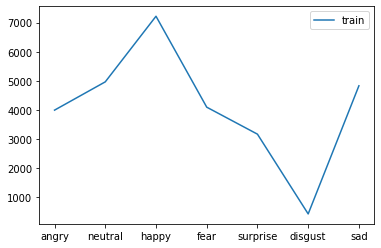

In [ ]:
train_count.transpose().plot(kind='line')

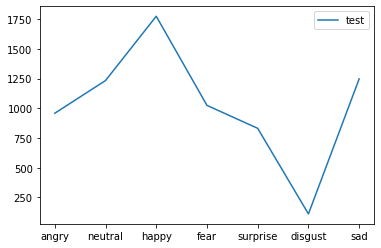

In [ ]:
test_count.transpose().plot(kind='line')

In [ ]:
from tensorflow.keras.utils import load_img

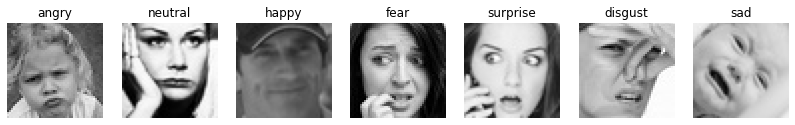

In [ ]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/'+expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


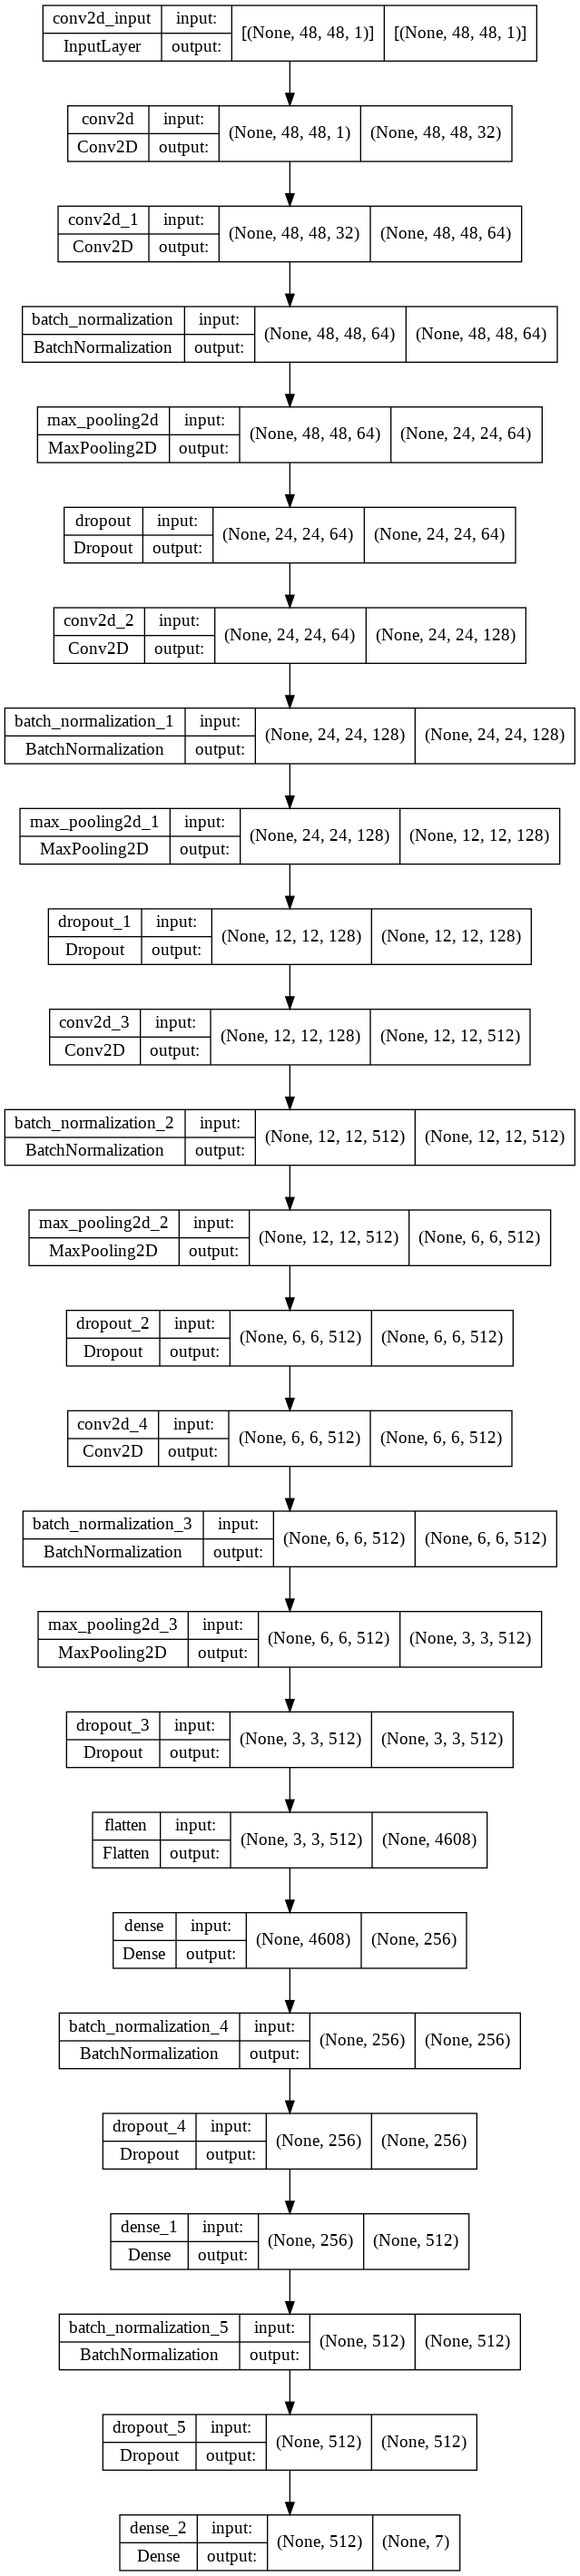

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 60
batch_size = 64

In [ ]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48,48),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
          target_size = (48,48),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 44s 88ms/step - loss: 9.3079 - accuracy: 0.1897 - val_loss: 9.5928 - val_accuracy: 0.1718
Epoch 2/60
359/359 [==============================] - 29s 81ms/step - loss: 8.2877 - accuracy: 0.2215 - val_loss: 7.5517 - val_accuracy: 0.2912
Epoch 3/60
359/359 [==============================] - 29s 82ms/step - loss: 7.2972 - accuracy: 0.2490 - val_loss: 6.5979 - val_accuracy: 0.3156
Epoch 4/60
359/359 [==============================] - 29s 81ms/step - loss: 6.3284 - accuracy: 0.2856 - val_loss: 5.7270 - val_accuracy: 0.3184
Epoch 5/60
359/359 [==============================] - 29s 81ms/step - loss: 5.4636 - accuracy: 0.3092 - val_loss: 4.9755 - val_accuracy: 0.3541
Epoch 6/60
359/359 [==============================] - 30s 83ms/step - loss: 4.7007 - accuracy: 0.3456 - val_loss: 4.2111 - val_accuracy: 0.3946
Epoch 7/60
359/359 [==============================] - 29s 81ms/step - loss: 4.0741 - accuracy: 0.3742 - val_loss: 3.8325 - val_accuracy:

In [ ]:
import seaborn as sn

In [ ]:
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}
cm_train = confusion_matrix(train_generator.classes, y_pred)

Text(69.0, 0.5, 'Truth')

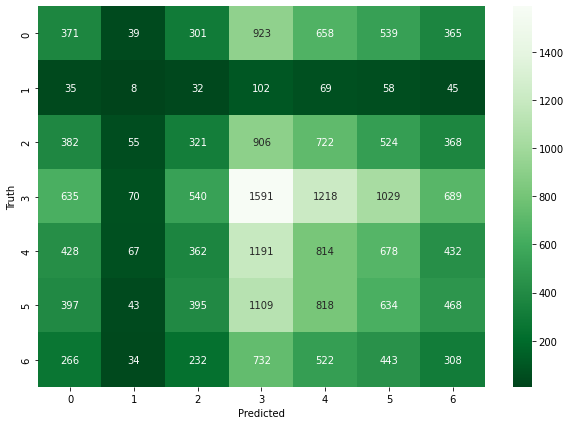

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_train,annot=True,fmt='d',cmap="Greens_r")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}
cm_train = confusion_matrix(validation_generator.classes, y_pred)

Text(69.0, 0.5, 'Truth')

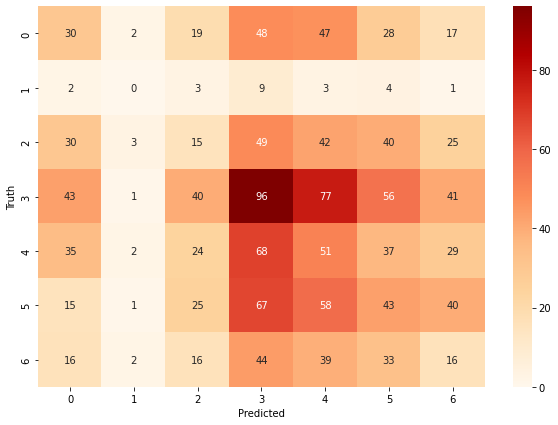

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_train,annot=True,fmt='d',cmap="OrRd")
plt.xlabel("Predicted")
plt.ylabel("Truth")

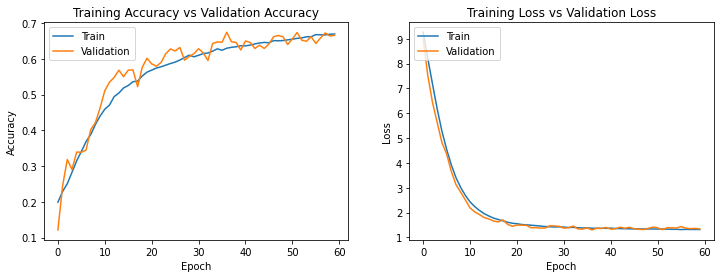

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
model.save('model_optimal.h5')

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 31ms/step - loss: 1.3440 - accuracy: 0.6662
final train accuracy = 71.82 , validation accuracy = 66.62


In [ ]:
model.save_weights('model_weights.h5')

In [ ]:
emotion_labels = test_set.class_indices
emotion_labels = {v:k for k,v in emotion_labels.items()}

In [ ]:
from tensorflow.keras import models

In [ ]:
model=models.load_model('./model_optimal.h5')

(1, 48, 48)
The emotion is: angry


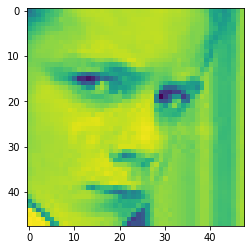

In [ ]:
wild_test_img=load_img('./angry.jpg',target_size=(48,48),color_mode="grayscale")
plt.imshow(wild_test_img)
wild_test_img=np.array(wild_test_img)
wild_test_img=np.expand_dims(wild_test_img,axis=0)
print(wild_test_img.shape)
wild_test_img = wild_test_img.reshape(1,48,48,1)
result=model.predict(wild_test_img)
result=list(result[0])
index=result.index(max(result))
print("The emotion is: "+ emotion_labels[index])

(1, 48, 48)
The emotion is: fear


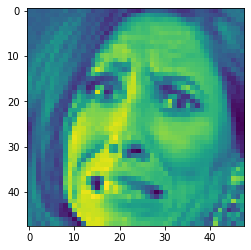

In [ ]:
wild_test_img=load_img('./fear.jpg',target_size=(48,48),color_mode="grayscale")
plt.imshow(wild_test_img)
wild_test_img=np.array(wild_test_img)
wild_test_img=np.expand_dims(wild_test_img,axis=0)
print(wild_test_img.shape)
wild_test_img = wild_test_img.reshape(1,48,48,1)
result=model.predict(wild_test_img)
result=list(result[0])
index=result.index(max(result))
print("The emotion is: "+ emotion_labels[index])

(1, 48, 48)
The emotion is: happy


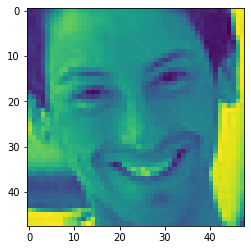

In [ ]:
wild_test_img=load_img('./happy.jpg',target_size=(48,48),color_mode="grayscale")
plt.imshow(wild_test_img)
wild_test_img=np.array(wild_test_img)
wild_test_img=np.expand_dims(wild_test_img,axis=0)
print(wild_test_img.shape)
wild_test_img = wild_test_img.reshape(1,48,48,1)
result=model.predict(wild_test_img)
result=list(result[0])
index=result.index(max(result))
print("The emotion is: "+ emotion_labels[index])

(1, 48, 48)
The emotion is: sad


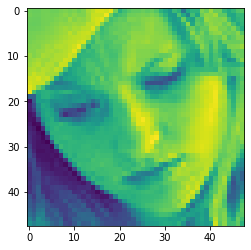

In [ ]:
wild_test_img=load_img('./sad.jpg',target_size=(48,48),color_mode="grayscale")
plt.imshow(wild_test_img)
wild_test_img=np.array(wild_test_img)
wild_test_img=np.expand_dims(wild_test_img,axis=0)
print(wild_test_img.shape)
wild_test_img = wild_test_img.reshape(1,48,48,1)
result=model.predict(wild_test_img)
result=list(result[0])
index=result.index(max(result))
print("The emotion is: "+ emotion_labels[index])

(1, 48, 48)
The emotion is: surprise


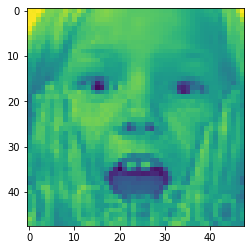

In [ ]:
wild_test_img=load_img('./surprise.jpg',target_size=(48,48),color_mode="grayscale")
plt.imshow(wild_test_img)
wild_test_img=np.array(wild_test_img)
wild_test_img=np.expand_dims(wild_test_img,axis=0)
print(wild_test_img.shape)
wild_test_img = wild_test_img.reshape(1,48,48,1)
result=model.predict(wild_test_img)
result=list(result[0])
index=result.index(max(result))
print("The emotion is: "+ emotion_labels[index])

(1, 48, 48)
The emotion is: disgust


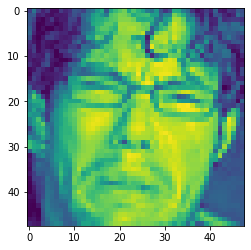

In [ ]:
wild_test_img=load_img('./disgust.jpg',target_size=(48,48),color_mode="grayscale")
plt.imshow(wild_test_img)
wild_test_img=np.array(wild_test_img)
wild_test_img=np.expand_dims(wild_test_img,axis=0)
print(wild_test_img.shape)
wild_test_img = wild_test_img.reshape(1,48,48,1)
result=model.predict(wild_test_img)
result=list(result[0])
index=result.index(max(result))
print("The emotion is: "+ emotion_labels[index])

(1, 48, 48)
The emotion is: neutral


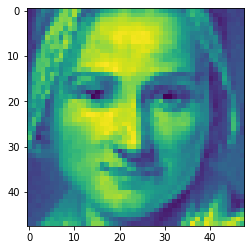

In [ ]:
wild_test_img=load_img('./neutral.jpg',target_size=(48,48),color_mode="grayscale")
plt.imshow(wild_test_img)
wild_test_img=np.array(wild_test_img)
wild_test_img=np.expand_dims(wild_test_img,axis=0)
print(wild_test_img.shape)
wild_test_img = wild_test_img.reshape(1,48,48,1)
result=model.predict(wild_test_img)
result=list(result[0])
index=result.index(max(result))
print("The emotion is: "+ emotion_labels[index])